In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import timeit

sns.set_style("ticks")
%matplotlib inline
# %load_ext lab_black

In [2]:
SMALL_SIZE = 15
MEDIUM_SIZE = 18
BIGGER_SIZE = 21
plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
np.random.seed(100)

n_iters = 10 ** 5
# number of repetitinos per simulation
bins_n = 7
# number of bins wanted in histogram


# model parameters:

num_rooms = 100
# number of rooms
rental_rate = 250
# daily rental rate
variable_cost = 60
# variable cost for room

no_show_p = 0.05
# probability a guest makes a reservation but doesn't show up
cost_overbooked = 400
# cost for accomndating overbooked rooms

num_reserve = np.arange(95, 115)
# the number of reservations taken to be considered in simulation eg from 98 reservations to 110 reservations

## Calculation

### vectorized

Number of Reservation : 95 Average Profit: $18334.96
Number of Reservation : 96 Average Profit: $18528.09
Number of Reservation : 97 Average Profit: $18721.11
Number of Reservation : 98 Average Profit: $18914.04
Number of Reservation : 99 Average Profit: $19106.64
Number of Reservation : 100 Average Profit: $19299.82
Number of Reservation : 101 Average Profit: $19491.04
Number of Reservation : 102 Average Profit: $19672.08
Number of Reservation : 103 Average Profit: $19829.38
Number of Reservation : 104 Average Profit: $19944.45
Number of Reservation : 105 Average Profit: $20008.75
Number of Reservation : 106 Average Profit: $20017.4
Number of Reservation : 107 Average Profit: $19983.39
Number of Reservation : 108 Average Profit: $19901.06
Number of Reservation : 109 Average Profit: $19802.6
Number of Reservation : 110 Average Profit: $19687.98
Number of Reservation : 111 Average Profit: $19567.13
Number of Reservation : 112 Average Profit: $19441.06
Number of Reservation : 113 Average

<function matplotlib.pyplot.show(close=None, block=None)>

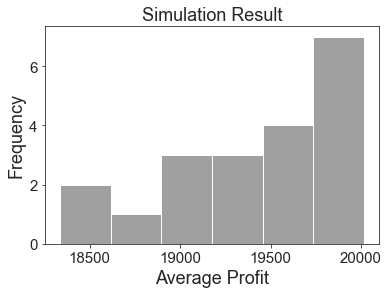

In [4]:
start = timeit.default_timer()
# start execution timer


num_arrivals = np.array(
    [
        [np.random.binomial(j, (1 - no_show_p)) for i in range(n_iters)]
        for j in num_reserve
    ]
)
# make a matrix for arrivals using binomial distribution with different number of reservations 
# number of rows = range or num_reserve
# number of columns = n_iters
num_staying = np.minimum(num_arrivals, num_rooms)
# returns the number of people stayin
num_overbooked = np.maximum(0, num_arrivals - num_rooms)
# returns the number of overbooked rooms

daily_profit = (
    num_reserve.dot(rental_rate)[:, None]
    - variable_cost * num_staying
    - cost_overbooked * num_overbooked
)
# daily profit is daily rate - variable cost - cost of overbooking

avg_profit = np.around(np.average(daily_profit, axis=1),decimals=2)
# returns the average daily profit per simulation

for i, j in zip(num_reserve, avg_profit):
    print(f"Number of Reservation : {i} Average Profit: ${j}")
# zip and print

stop = timeit.default_timer()
# stop execution timer
print("Execution Time: ", stop - start)
# print(num_arrivals_2)

fig, ax = plt.subplots()
sns.histplot(data=avg_profit,color="gray")
ax.set(xlabel="Average Profit", ylabel="Frequency",title="Simulation Result")
plt.show

## using np.ones

Number of Reservation : 95 Average Profit: $18335.06
Number of Reservation : 96 Average Profit: $18528.19
Number of Reservation : 97 Average Profit: $18721.25
Number of Reservation : 98 Average Profit: $18914.09
Number of Reservation : 99 Average Profit: $19107.59
Number of Reservation : 100 Average Profit: $19299.66
Number of Reservation : 101 Average Profit: $19491.26
Number of Reservation : 102 Average Profit: $19672.79
Number of Reservation : 103 Average Profit: $19828.73
Number of Reservation : 104 Average Profit: $19947.57
Number of Reservation : 105 Average Profit: $20006.66
Number of Reservation : 106 Average Profit: $20020.12
Number of Reservation : 107 Average Profit: $19979.82
Number of Reservation : 108 Average Profit: $19904.01
Number of Reservation : 109 Average Profit: $19806.06
Number of Reservation : 110 Average Profit: $19689.61
Number of Reservation : 111 Average Profit: $19560.21
Number of Reservation : 112 Average Profit: $19436.74
Number of Reservation : 113 Avera

<function matplotlib.pyplot.show(close=None, block=None)>

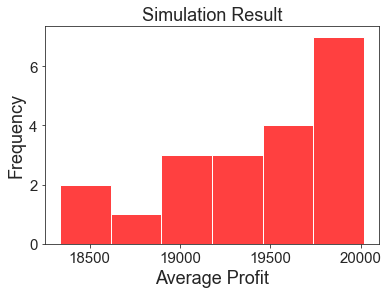

In [5]:
start = timeit.default_timer()
# start execution timer
temp1=[]
for j in num_reserve:
    arr_iters = np.ones(n_iters) * j
    # initialize number of arrivals array
    num_arrivals = []
    for i in arr_iters:
        num_arrivals.append(np.random.binomial(i, (1 - no_show_p), size=None))
    # returns the number of arrivals
    num_arrivals = np.array(num_arrivals)
    # transform the number of arrivals into an numpy array
    num_staying = np.minimum(num_arrivals, num_rooms)
    # returns the number of people stayin
    num_overbooked = np.maximum(0, num_arrivals - num_rooms)
    # returns the number of overbooked rooms
    daily_profit = (
        rental_rate * j - variable_cost * num_staying - cost_overbooked * num_overbooked
    )
    # daily profit
    avg_profit = np.average(daily_profit)
    # returns the average daily profit per simulation
    print(f"Number of Reservation : {j} Average Profit: ${avg_profit:.2f}")
    temp1.append(avg_profit)

stop = timeit.default_timer()
# stop execution timer
print("Execution Time: ", stop - start)

fig, ax = plt.subplots()
sns.histplot(data=temp1,color="red")
ax.set(xlabel="Average Profit", ylabel="Frequency",title="Simulation Result")
plt.show